# GARCH Stock Forecasting

## Read Data

In [4]:
import warnings
warnings.filterwarnings('ignore')
import yfinance as yfin
yfin.pdr_override()
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [5]:
start = datetime(2015, 1, 1)
#end = datetime(2020, 6, 11)
end=datetime(2023, 6, 30)
dis = web.get_data_yahoo('DIS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [6]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

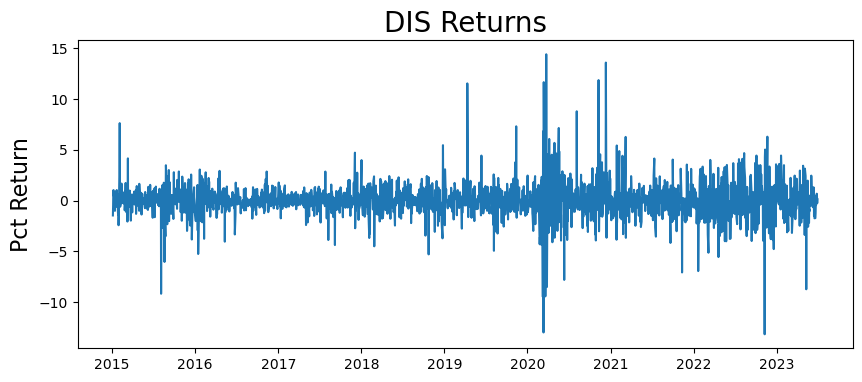

In [7]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

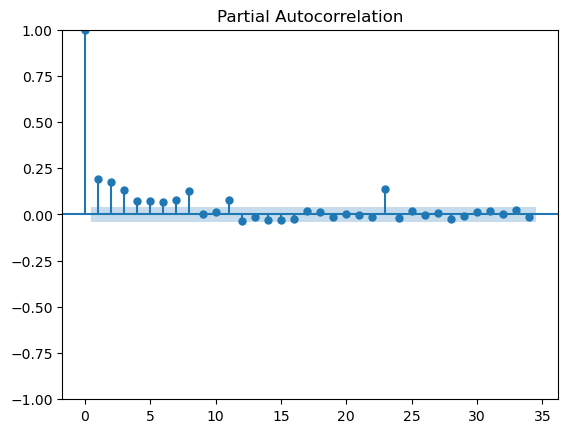

In [8]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [9]:
model = arch_model(returns, p=3, q=3)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 8690.516259818074
Iteration:      2,   Func. Count:     24,   Neg. LLF: 8929.431128263252
Iteration:      3,   Func. Count:     36,   Neg. LLF: 5449.886479004593
Iteration:      4,   Func. Count:     47,   Neg. LLF: 4550.330545807757
Iteration:      5,   Func. Count:     59,   Neg. LLF: 4029.2220804650783
Iteration:      6,   Func. Count:     69,   Neg. LLF: 3993.3911666948707
Iteration:      7,   Func. Count:     79,   Neg. LLF: 3988.9613091904152
Iteration:      8,   Func. Count:     89,   Neg. LLF: 3979.952025467482
Iteration:      9,   Func. Count:     98,   Neg. LLF: 4015.1244096255386
Iteration:     10,   Func. Count:    110,   Neg. LLF: 4018.9054337618954
Iteration:     11,   Func. Count:    120,   Neg. LLF: 3978.8543020308325
Iteration:     12,   Func. Count:    129,   Neg. LLF: 3978.457483826988
Iteration:     13,   Func. Count:    138,   Neg. LLF: 3978.830032512479
Iteration:     14,   Func. Count:    148,   Neg. LLF: 3978

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3978.39
Distribution:                  Normal   AIC:                           7972.77
Method:            Maximum Likelihood   BIC:                           8018.11
                                        No. Observations:                 2136
Date:                Sun, Jul 09 2023   Df Residuals:                     2135
Time:                        13:46:14   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -8.1486e-03  3.323e-02     -0.245      0.806 [-7.329e-02,5.699e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0908      0.206      0.440      0.660   [ -0.314,  0.495]
alpha[1]       0.1008  3.140e-02      3.210  1.327e-03 [3.925e-02,  0.162]
alpha[2]       0.0322      0.238      0.135      0.892   [ -0.435,  0.499]
alpha[3]       0.0000  7.958e-02      0.000      1.000   [ -0.156,  0.156]
beta[1]    1.0865e-15      2.422  4.487e-16      1.000   [ -4.747,  4.747]
beta[2]        0.8463  7.581e-02     11.164  6.126e-29   [  0.698,  0.995]
beta[3]        0.0000      2.059      0.000      1.000   [ -4.035,  4.035]
==========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [12]:
model = arch_model(returns, p=3, q=0)

In [13]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6034.865977427108
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10279.072255478677
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8082.958680971778
Iteration:      4,   Func. Count:     33,   Neg. LLF: 4571.59840455147
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4754.672817034985
Iteration:      6,   Func. Count:     47,   Neg. LLF: 4251.348373660056
Iteration:      7,   Func. Count:     55,   Neg. LLF: 4085.1772133238665
Iteration:      8,   Func. Count:     61,   Neg. LLF: 4085.0023829483716
Iteration:      9,   Func. Count:     67,   Neg. LLF: 4084.9809520092103
Iteration:     10,   Func. Count:     73,   Neg. LLF: 4084.9775627477247
Iteration:     11,   Func. Count:     79,   Neg. LLF: 4084.9775025665067
Iteration:     12,   Func. Count:     85,   Neg. LLF: 4084.977500375905
Iteration:     13,   Func. Count:     90,   Neg. LLF: 4084.9775003757914
Optimization terminated successfully    (Exit mode 0)
    

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4084.98
Distribution:                  Normal   AIC:                           8179.96
Method:            Maximum Likelihood   BIC:                           8208.29
                                        No. Observations:                 2136
Date:                Sun, Jul 09 2023   Df Residuals:                     2135
Time:                        13:46:45   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.5535e-03  3.659e-02      0.152      0.879 [-6.617e-02,7.727e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7280      0.338      5.114  3.159e-07    [  1.066,  2.390]
alpha[1]       0.1050  3.912e-02      2.684  7.284e-03  [2.831e-02,  0.182]
alpha[2]       0.2621  8.819e-02      2.972  2.961e-03  [8.923e-02,  0.435]
alpha[3]       0.1218  8.239e-02      1.478      0.139 [-3.970e-02,  0.283]
===========================================================================

Covariance estimator: robust
"""

In [33]:
rolling_predictions = []
test_size = 365*3

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [34]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*3:])

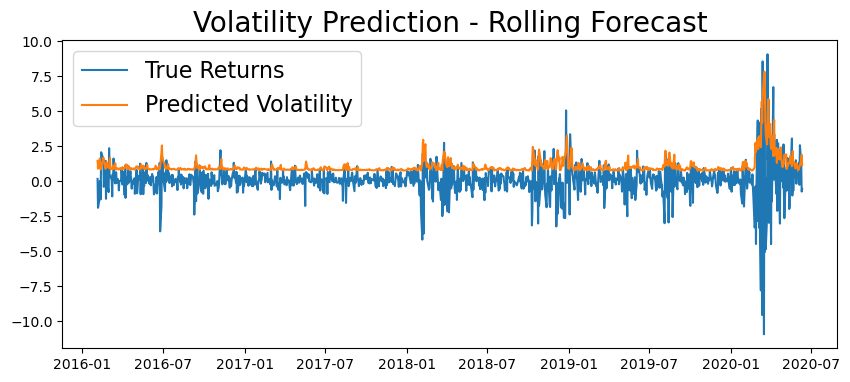

In [35]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*3:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [18]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 11)
spy = web.get_data_yahoo('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [19]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

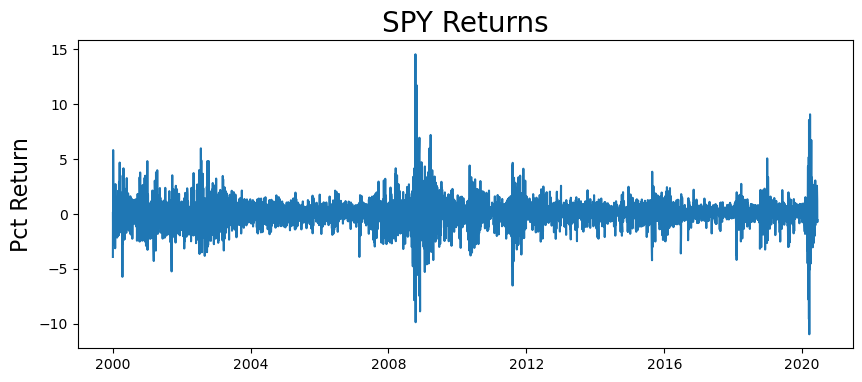

In [20]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

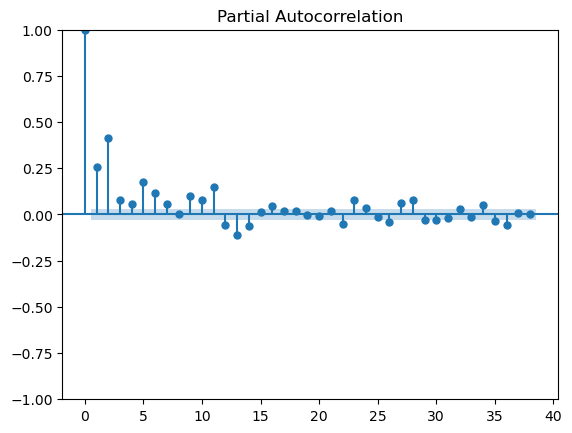

In [21]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [22]:
model = arch_model(returns, p=2, q=2)

In [23]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95621.63885848943
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56371.9660605418
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11215.322641844508
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13887.854617464736
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2133251139.5014632
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7231.192792739356
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7089.762632480353
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7056.838207552253
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7055.797983819273
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7053.566838856668
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7053.566735140877
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7053.566735138424
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7053.566735140877
            Iterations: 12

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7053.57
Distribution:                  Normal   AIC:                           14119.1
Method:            Maximum Likelihood   BIC:                           14158.4
                                        No. Observations:                 5141
Date:                Sun, Jul 09 2023   Df Residuals:                     5140
Time:                        13:47:32   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.054  1.411e-09 [4.486e-02,8.782e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0407  9.930e-03      4.094  4.245e-05 [2.119e-02,6.011e-02]
alpha[1]       0.0809  2.203e-02      3.673  2.396e-04   [3.775e-02,  0.124]
alpha[2]       0.1331  3.037e-02      4.382  1.175e-05   [7.356e-02,  0.193]
beta[1]        0.2976      0.293      1.014      0.310     [ -0.277,  0.873]
beta[2]        0.4592      0.258      1.777  7.563e-02  [-4.739e-02,  0.966]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [25]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [26]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

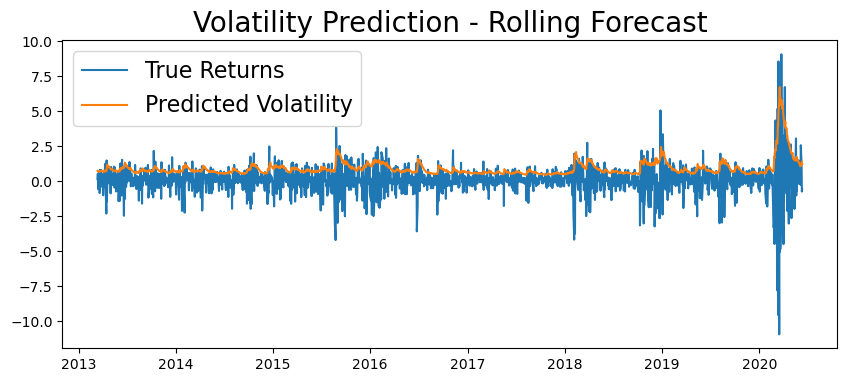

In [27]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [25]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [26]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

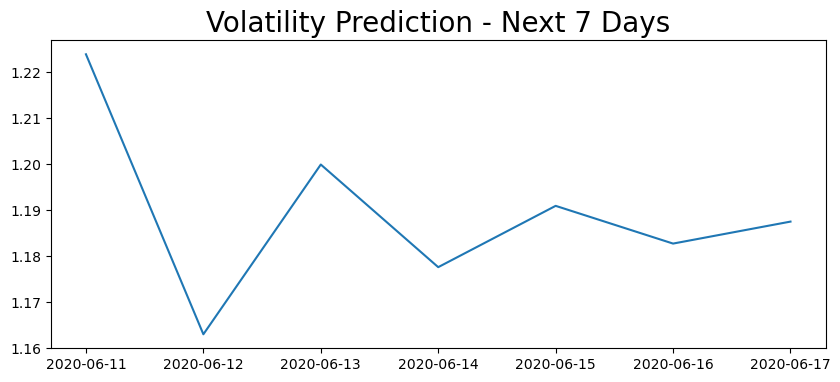

In [27]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)